In [1]:
from DT import decision_tree
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generate a new dataset with three clusters: two red (class 1) and two blue (class 0)
np.random.seed(17)
X0_1 = np.random.normal(loc=[1.6, 1.1], scale=0.1, size=(30, 2))       # Blue cluster 1
X0_2 = np.random.normal(loc=[2.5, 1.4], scale=0.1, size=(20, 2))     # Blue cluster 2
X0_3 = np.random.normal(loc=[2.0, 1.8], scale=0.1, size=(40, 2))      # Blue cluster 3
X1_1 = np.random.normal(loc=[2, 1.5], scale=0.1, size=(50, 2))       # Red cluster 1
X1_2 = np.random.normal(loc=[1.3, 1.8], scale=0.1, size=(40, 2))   # Red cluster 2

X = np.vstack((X0_1, X0_2, X0_3, X1_1, X1_2))
y = np.array([0]*(X0_1.shape[0] + X0_2.shape[0] + X0_3.shape[0]) + 
             [1]*(X1_1.shape[0] + X1_2.shape[0]))

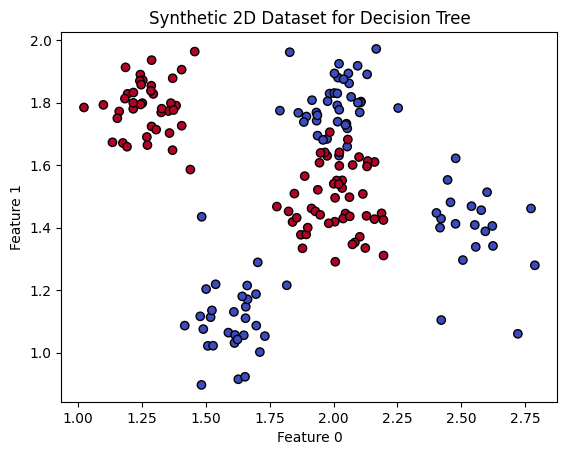

In [3]:
# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title("Synthetic 2D Dataset for Decision Tree")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

In [4]:
# Train decision tree
model = decision_tree()
model.fit(X, y)

# Show tree structure and number of leaf nodes
print(model)
print(f"Number of leaf nodes: {model._n_leaf}")

The decision tree is given as below :
..............................................

Node: Feature 0 <= 1.406
	Leaf: label = 1, size = 38, pure leaf = True
	Node: Feature 1 <= 1.289
		Leaf: label = 0, size = 32, pure leaf = True
		Node: Feature 1 <= 1.641
			Node: Feature 0 <= 2.196
				Node: Feature 0 <= 1.484
					Leaf: label = 0, size = 2, pure leaf = False
					Node: Feature 1 <= 1.600
						Leaf: label = 1, size = 40, pure leaf = True
						Leaf: label = 1, size = 10, pure leaf = False
				Leaf: label = 0, size = 17, pure leaf = True
			Node: Feature 0 <= 1.457
				Leaf: label = 1, size = 1, pure leaf = True
				Node: Feature 1 <= 1.705
					Node: Feature 0 <= 1.975
						Leaf: label = 0, size = 3, pure leaf = True
						Leaf: label = 1, size = 3, pure leaf = False
					Leaf: label = 0, size = 34, pure leaf = True

Number of leaf nodes: 10


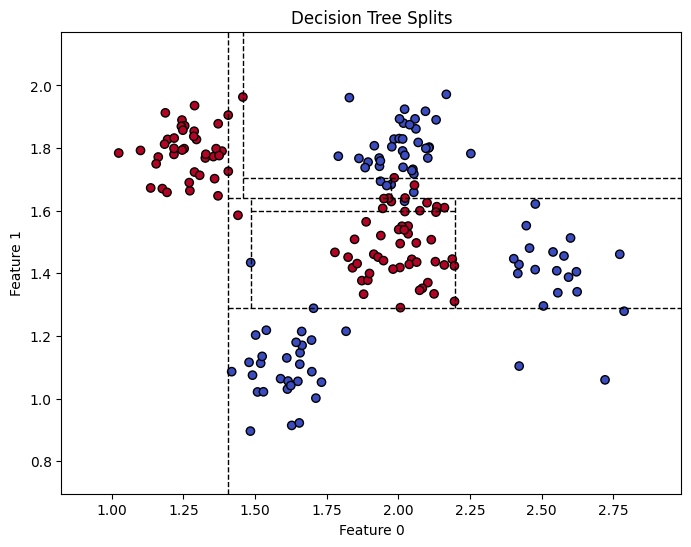

In [5]:
# Plot decision boundaries
def plot_splits(tree, x_min, x_max, y_min, y_max):
    if tree['leaf']:
        return
    feat = tree['feature']
    thresh = tree['threshold']
    if feat == 0:
        plt.plot([thresh, thresh], [y_min, y_max], 'k--', lw=1)
        plot_splits(tree['left'], x_min, thresh, y_min, y_max)
        plot_splits(tree['right'], thresh, x_max, y_min, y_max)
    else:
        plt.plot([x_min, x_max], [thresh, thresh], 'k--', lw=1)
        plot_splits(tree['left'], x_min, x_max, y_min, thresh)
        plot_splits(tree['right'], x_min, x_max, thresh, y_max)

x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plot_splits(model._tree, x_min, x_max, y_min, y_max)
plt.title("Decision Tree Splits")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

In [6]:
# Test predictions
test_points = np.array([[0.5, 2], [0.5, -1.5], [2, 0], [4, 0]])
y_pred = model.predict(test_points)
print("Predictions for test points:", y_pred)

Predictions for test points: [1 1 0 0]
